In [1]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
from nltk import word_tokenize, ngrams

In [9]:
from sklearn.naive_bayes import BernoulliNB

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Target Mapping
mapping_target = {'happy':0, 'not happy':1}
train = train.replace({'Is_Response':mapping_target})

# Browser Mapping
mapping_browser = {'Firefox':0, 'Mozilla':0, 'Mozilla Firefox':0,
                  'Edge': 1, 'Internet Explorer': 1 , 'InternetExplorer': 1, 'IE':1,
                   'Google Chrome':2, 'Chrome':2,
                   'Safari': 3, 'Opera': 4
                  }
train = train.replace({'Browser_Used':mapping_browser})

# Device mapping
mapping_device = {'Desktop':0, 'Mobile':1, 'Tablet':2}
train = train.replace({'Device_Used':mapping_device})

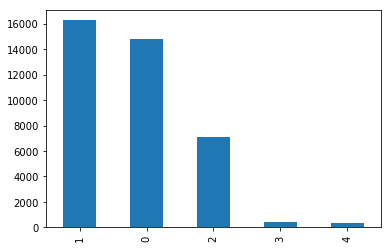

In [4]:
train['Browser_Used'].value_counts().plot(kind='bar')
#plt.show()

In [5]:
test_id = test['User_ID']
target = train['Is_Response']

In [23]:
# vectorizer = TfidfVectorizer(stop_words='english')
# vectorizer.fit(train['Description'])
#print ((vectorizer.get_feature_names()))

# CountVectorizer to create BagOfWords (By default it will remove all stopwords,
# change each word into lowercase and it won't consider punctuation)
#count_vector = CountVectorizer(stop_words='english')
count_vector = TfidfVectorizer(
                             sublinear_tf=True,
                             use_idf=True)
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(train['Description'])
# Transform testing data and return the matrix.
testing_data = count_vector.transform(test['Description'])

#naive_bayes = MultinomialNB()
naive_bayes = LinearSVC()
naive_bayes.fit(training_data,target)
# Prediction
pred = naive_bayes.predict(testing_data)

#print((training_data.data))
# clf = RandomForestClassifier()
# clf.fit(training_data,target)

# pred = clf.predict(testing_data)


In [24]:
result = pd.DataFrame()
result['User_ID'] = test_id
result['Is_Response'] = pred
mapping = {0:'happy', 1:'not_happy'}
result = result.replace({'Is_Response':mapping})

result.to_csv("predicted_result.csv", index=False)